## GoMyCode Diploma in DataScience Project

### Topic: Cardiac Risk AI -Predicting Heart Disease with Clinical Intelligence


#### Project Overview
CardioRisk AI is a machine learning-powered diagnostic tool designed to predict the likelihood of heart disease in individuals based on clinical, demographic, and lifestyle data. It uses a synthetic dataset that mimics real-world patient records, enabling healthcare professionals and researchers to explore cardiovascular risk factors and build predictive models for early intervention.

#### Problem Statement
Heart disease is a leading global cause of death. Early detection is critical, yet many individuals go undiagnosed until symptoms become severe. This project aims to solve the problem of delayed diagnosis by building a predictive model using accessible patient data.

#### Project Goals
- Predict presence of heart disease using classification models.
- Identify influential features contributing to heart disease risk.
- Apply explainable AI techniques for transparency.
- Explore correlations among lifestyle, clinical metrics, and disease outcomes.



| Column        | Description                                                                 |
|---------------|------------------------------------------------------------------------------|
| age           | Age of the individual in years.                                              |
| sex           | Biological sex (commonly 0 = female, 1 = male).                              |
| cp            | Chest pain type (ordinal encoding of typical/atypical angina, non-anginal, asymptomatic). |
| trestbps      | Resting blood pressure (mm Hg) measured on admission.                        |
| chol          | Serum cholesterol (mg/dL).                                                   |
| fbs           | Fasting blood sugar >120 mg/dL indicator (0 = false, 1 = true).              |
| restecg       | Resting electrocardiogram results (encoded categories).                      |
| thalach       | Maximum heart rate achieved during exercise.                                 |
| exang         | Exercise-induced angina (0 = no, 1 = yes).                                   |
| oldpeak       | ST depression induced by exercise relative to rest.                          |
| slope         | Slope of the peak exercise ST segment (encoded categories).                  |
| ca            | Number of major vessels (0–3) colored by fluoroscopy.                        |
| thal          | Thalassemia status (encoded; commonly 3 = normal, 6 = fixed defect, 7 = reversible defect). |
| smoking       | Current smoking status (0 = no, 1 = yes).                                    |
| diabetes      | Diabetes status (0 = no, 1 = yes).                                            |
| bmi           | Body Mass Index (kg/m²).                                                     |
| heart_disease | Binary target: Presence of heart disease (0 = no, 1 = yes).                  |


In [46]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime

# Text processing
import re  
import string

# Visualizations 
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings 
import warnings
warnings.filterwarnings("ignore")


In [47]:
#load dataset
df=pd.read_csv("heart_disease_dataset.csv")
data=df.copy()
df1=df.copy()

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
categorical_features = ['sex', 'cp','fbs','restecg','exang','slope','ca','thal','smoking','diabetes']

encoded_value_map = {}
for col in categorical_features:
  df[col] = le.fit_transform(df[col])
  encoded_value_map[col] = dict(zip(le.classes_, range(len(le.classes_))))

print("Encoded value mappings:")
for col, mapping in encoded_value_map.items():
  print(f"Column '{col}': {mapping}")

Encoded value mappings:
Column 'sex': {0: 0, 1: 1}
Column 'cp': {1: 0, 2: 1, 3: 2, 4: 3}
Column 'fbs': {0: 0, 1: 1}
Column 'restecg': {0: 0, 1: 1, 2: 2}
Column 'exang': {0: 0, 1: 1}
Column 'slope': {1: 0, 2: 1, 3: 2}
Column 'ca': {0: 0, 1: 1, 2: 2, 3: 3}
Column 'thal': {3: 0, 6: 1, 7: 2}
Column 'smoking': {0: 0, 1: 1}
Column 'diabetes': {0: 0, 1: 1}


#### Inspect dataset

In [50]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,0
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1


In [51]:

data.shape

(3069, 17)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3069 non-null   int64  
 1   sex            3069 non-null   int64  
 2   cp             3069 non-null   int64  
 3   trestbps       3069 non-null   int64  
 4   chol           3069 non-null   int64  
 5   fbs            3069 non-null   int64  
 6   restecg        3069 non-null   int64  
 7   thalach        3069 non-null   int64  
 8   exang          3069 non-null   int64  
 9   oldpeak        3069 non-null   float64
 10  slope          3069 non-null   int64  
 11  ca             3069 non-null   int64  
 12  thal           3069 non-null   int64  
 13  smoking        3069 non-null   int64  
 14  diabetes       3069 non-null   int64  
 15  bmi            3069 non-null   float64
 16  heart_disease  3069 non-null   int64  
dtypes: float64(2), int64(15)
memory usage: 407.7 KB


In [53]:
data.duplicated().sum()

0

In [54]:
data.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
smoking          0
diabetes         0
bmi              0
heart_disease    0
dtype: int64

In [55]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
count,3069.00000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000
mean,52.50114,0.555556,2.489736,145.306289,347.219941,0.145650,1.004236,135.157380,0.176279,3.189052,2.023786,0.626588,4.544477,0.348974,0.193874,27.496839,0.403715
std,13.70752,0.496985,1.110417,31.602321,146.853319,0.352813,0.812016,43.353197,0.381119,1.802815,0.817679,0.891447,1.751064,0.476723,0.395396,7.281731,0.490721
min,29.00000,0.000000,1.000000,90.000000,100.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,15.000000,0.000000
25%,41.00000,0.000000,2.000000,118.000000,215.000000,0.000000,0.000000,98.000000,0.000000,1.600000,1.000000,0.000000,3.000000,0.000000,0.000000,21.300000,0.000000
50%,53.00000,1.000000,2.000000,146.000000,350.000000,0.000000,1.000000,135.000000,0.000000,3.200000,2.000000,0.000000,3.000000,0.000000,0.000000,27.400000,0.000000
75%,64.00000,1.000000,3.000000,172.000000,475.000000,0.000000,2.000000,172.000000,0.000000,4.700000,3.000000,1.000000,6.000000,1.000000,0.000000,33.900000,1.000000
max,76.00000,1.000000,4.000000,200.000000,600.000000,1.000000,2.000000,210.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.000000,40.000000,1.000000


In [56]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
age,1.000000,-0.025188,-0.029535,0.035303,0.001722,0.016916,0.009795,-0.023883,-0.041934,0.033059,0.028744,0.006783,0.006227,-0.011857,-0.001574,-0.029525,-0.013564
sex,-0.025188,1.000000,-0.015356,0.011762,-0.042936,-0.008055,-0.026025,-0.008946,-0.002677,0.011156,-0.058998,-0.004659,0.009239,-0.009630,0.010689,0.011185,0.007573
cp,-0.029535,-0.015356,1.000000,-0.019239,0.031950,0.006729,-0.009170,-0.006402,-0.018444,-0.008897,-0.017501,-0.024618,0.001283,0.003382,0.013071,-0.000365,-0.001665
trestbps,0.035303,0.011762,-0.019239,1.000000,-0.005646,-0.010609,0.023651,-0.009357,0.011077,0.025071,-0.023100,0.007463,0.005190,-0.012311,0.013897,-0.000278,-0.011171
chol,0.001722,-0.042936,0.031950,-0.005646,1.000000,0.027854,-0.015383,0.051841,-0.017931,-0.016972,-0.001648,-0.005258,-0.022381,0.016684,0.021023,-0.015417,0.014417
fbs,0.016916,-0.008055,0.006729,-0.010609,0.027854,1.000000,0.006948,0.002486,0.010189,-0.004461,-0.002974,-0.010452,0.001909,0.003893,-0.006219,0.017396,0.019842
restecg,0.009795,-0.026025,-0.009170,0.023651,-0.015383,0.006948,1.000000,-0.000371,0.019704,-0.010166,0.032248,0.000385,-0.010563,-0.029922,-0.002559,-0.000665,0.000615
thalach,-0.023883,-0.008946,-0.006402,-0.009357,0.051841,0.002486,-0.000371,1.000000,-0.003810,-0.030678,-0.020923,0.002795,0.012001,0.029578,0.000007,-0.001801,0.002237
exang,-0.041934,-0.002677,-0.018444,0.011077,-0.017931,0.010189,0.019704,-0.003810,1.000000,-0.021858,0.029424,0.044146,0.016820,-0.006808,-0.006242,0.000447,0.002772
oldpeak,0.033059,0.011156,-0.008897,0.025071,-0.016972,-0.004461,-0.010166,-0.030678,-0.021858,1.000000,0.017600,-0.003620,-0.026319,-0.002418,-0.008590,0.008510,-0.033246


#### Exploratory Data Analysis

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt


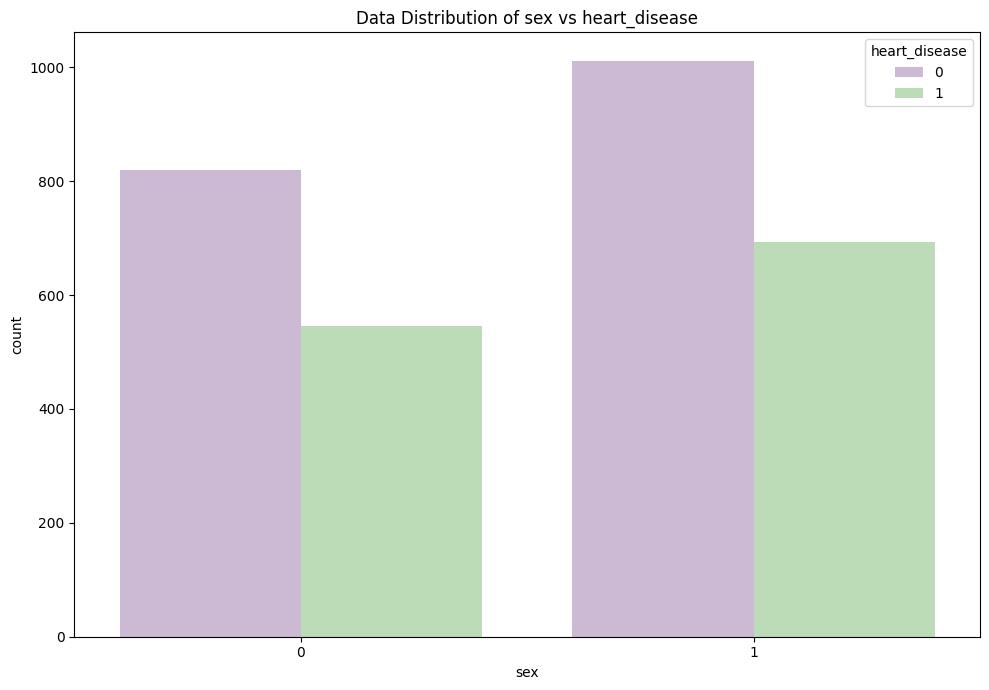

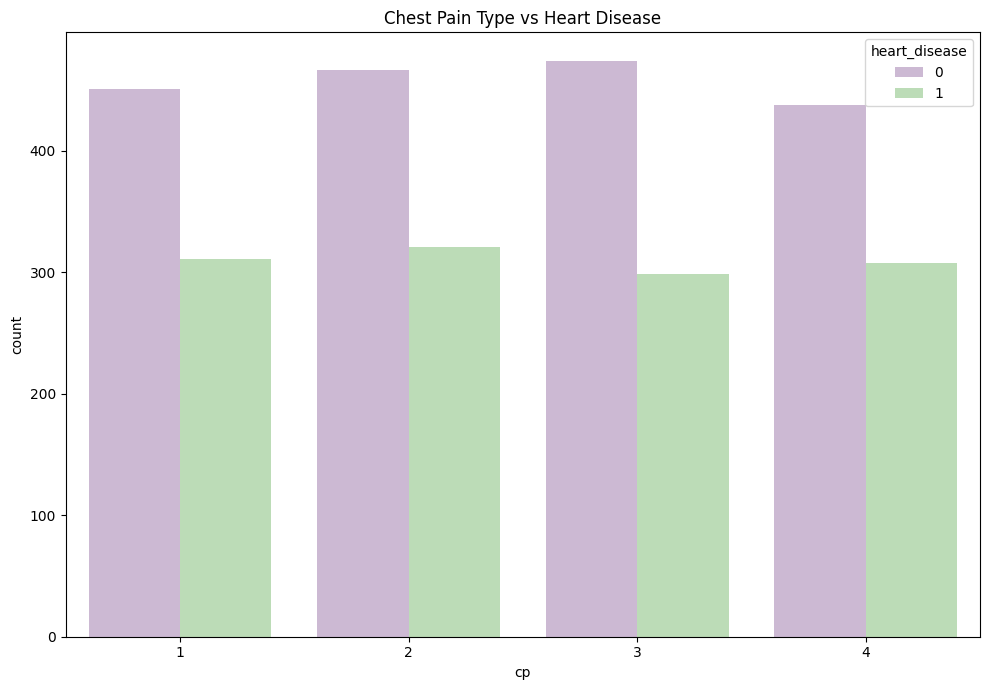

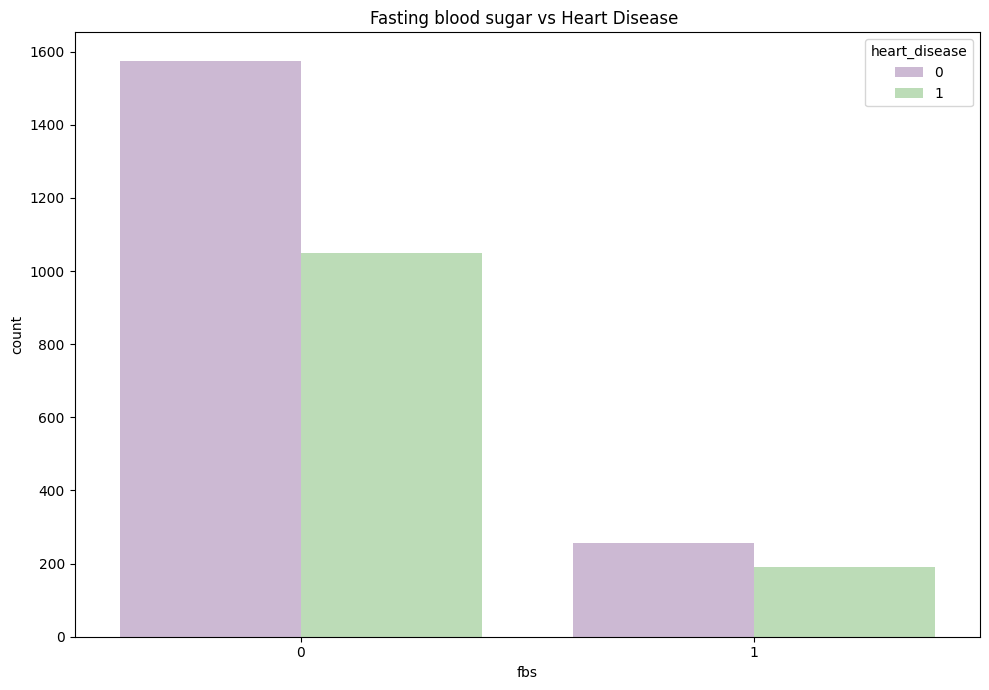

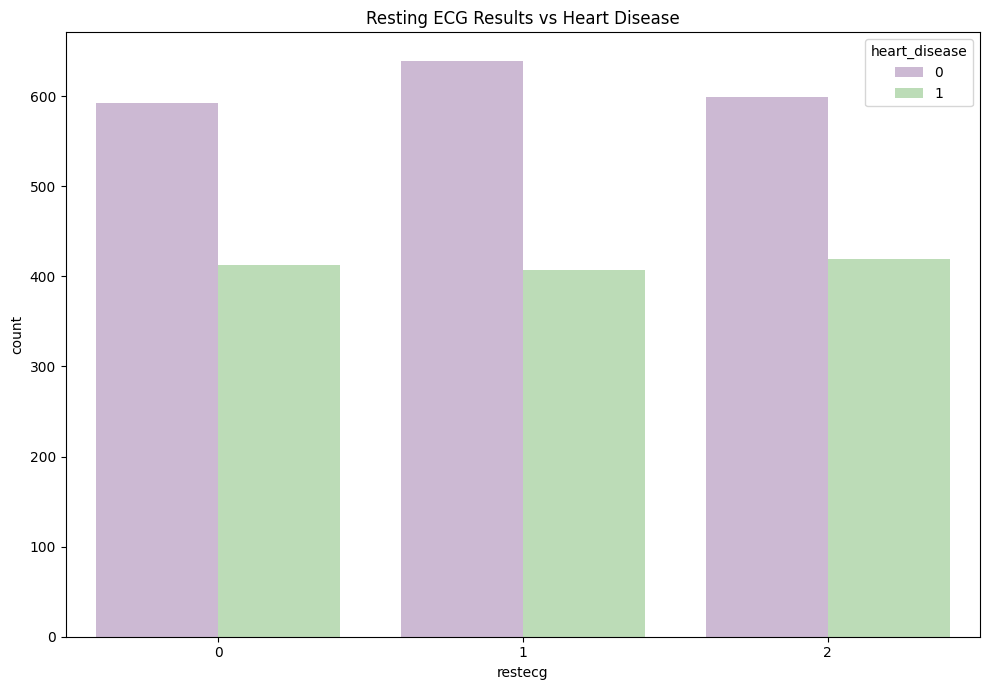

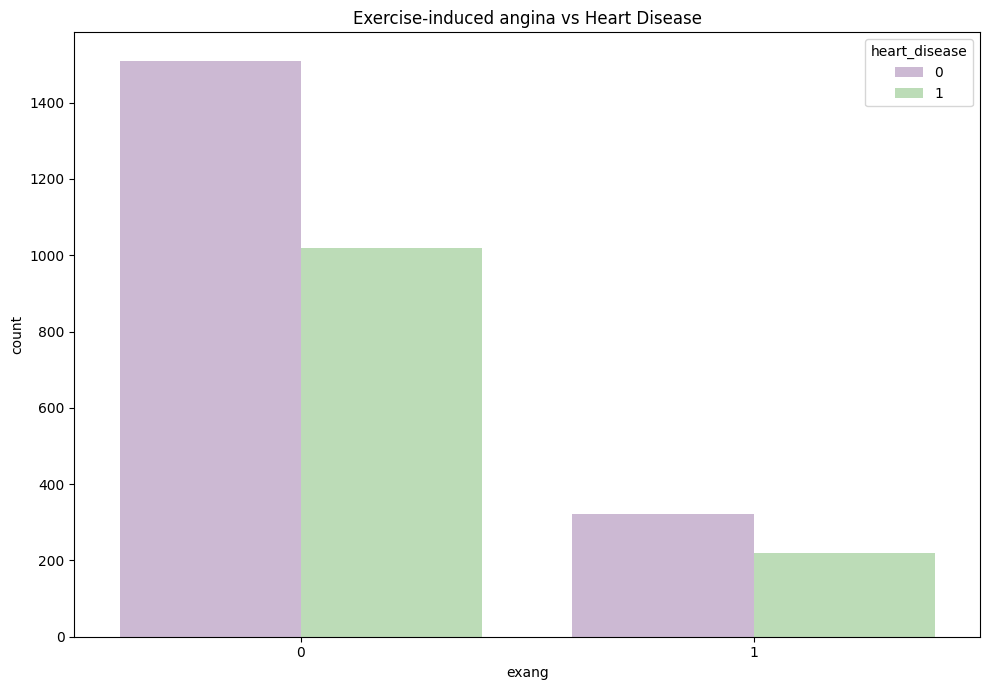

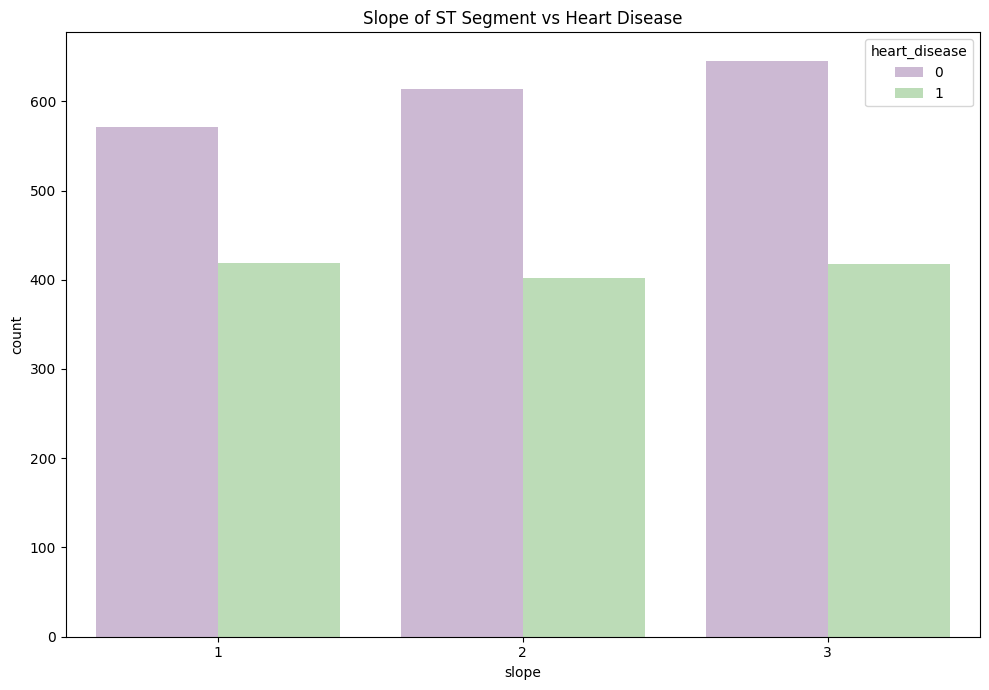

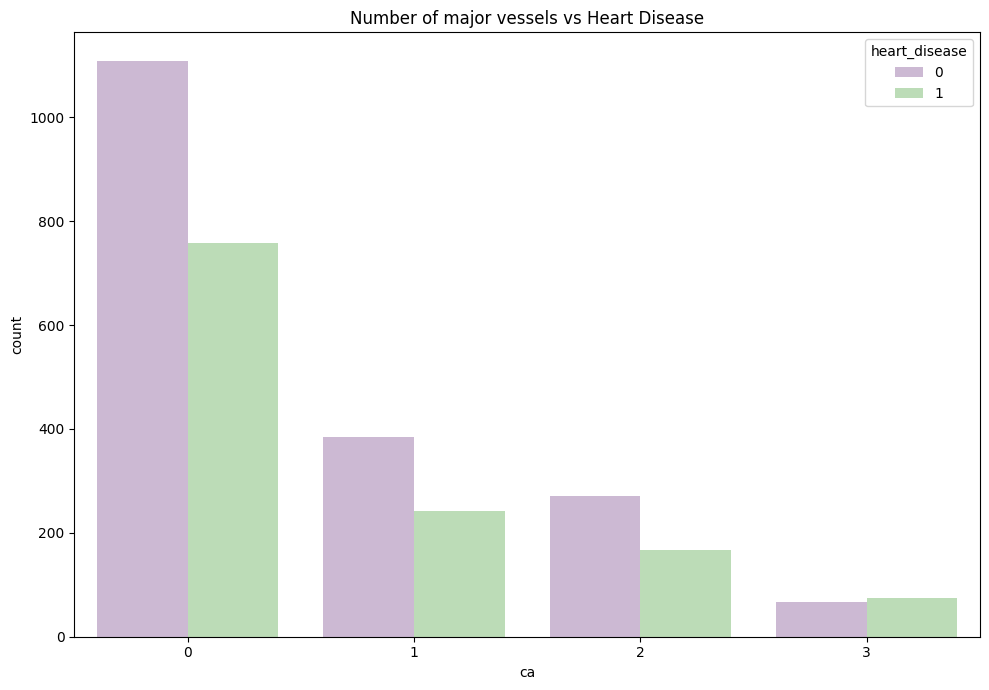

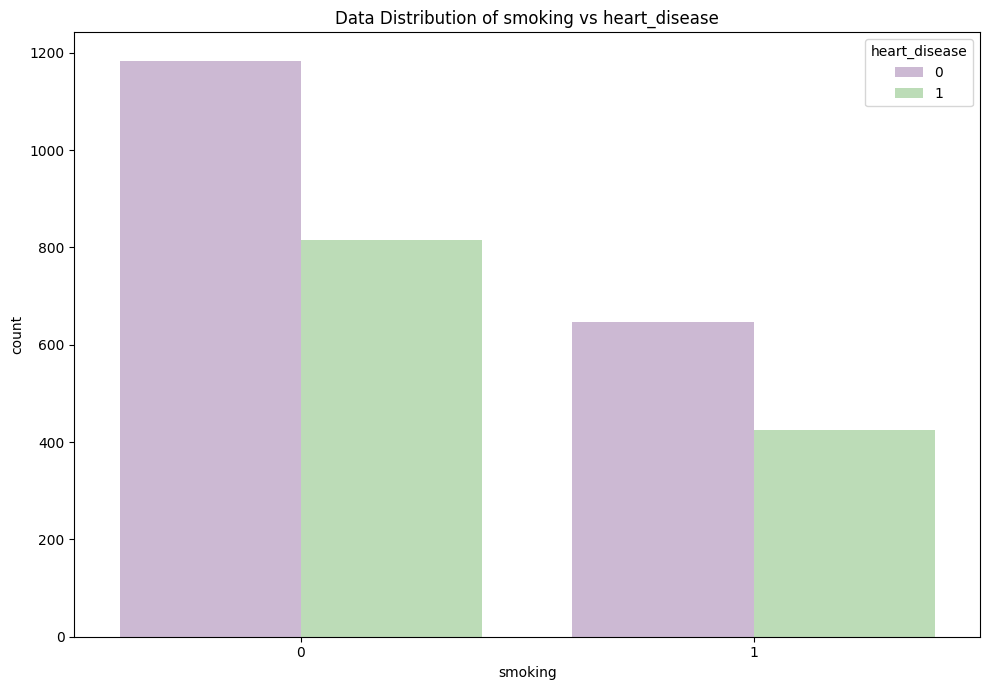

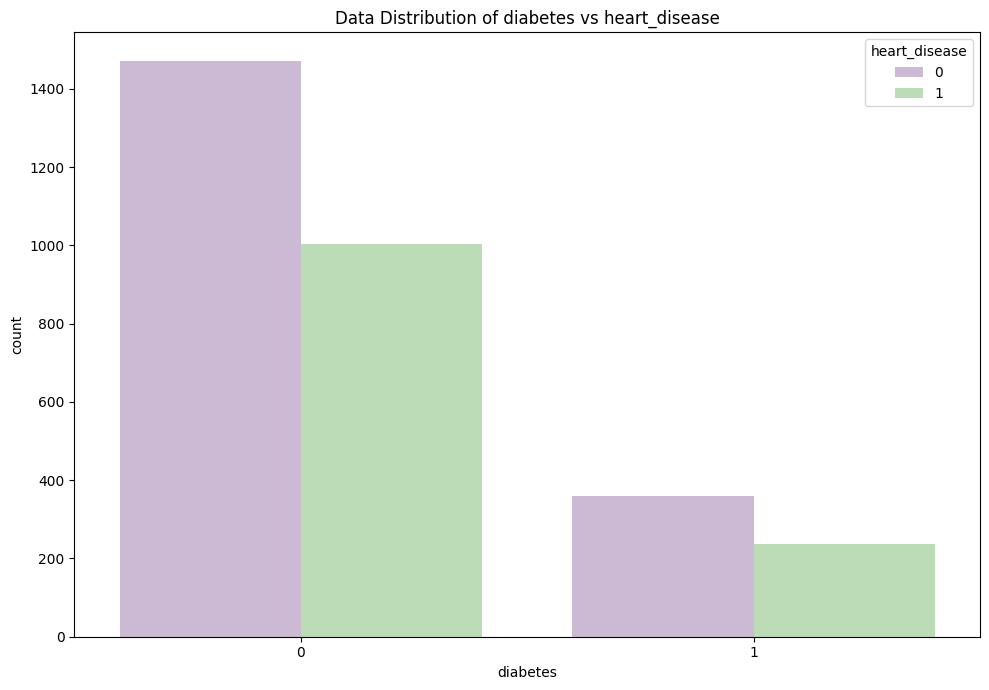

In [58]:
#plotting a bar chart for all categorical data column against the target:Heart disease
cat_col=data[["sex","cp","fbs","restecg","exang","slope","ca","smoking","diabetes"]]
#Custom titles for each plot
custom_titles = {
    'cp': 'Chest Pain Type vs Heart Disease',
    'restecg': 'Resting ECG Results vs Heart Disease',
    'slope': 'Slope of ST Segment vs Heart Disease',
    'thal': 'Thallium Stress Test Results vs Heart Disease',
    'exang': 'Exercise-induced angina vs Heart Disease',
    'ca': 'Number of major vessels vs Heart Disease',
    'fbs':'Fasting blood sugar vs Heart Disease '
}

for col in cat_col:
    plt.figure(figsize=(10, 7))
    sns.countplot(data=data, x=col, hue=df["heart_disease"],palette="PRGn")
    plt.title((custom_titles.get(col,f'Data Distribution of {col} vs heart_disease')))
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    

heart_disease
0    0.596285
1    0.403715
Name: proportion, dtype: float64


([<matplotlib.patches.Wedge at 0x27d896fda10>,
 [Text(-0.3276875698321752, 1.0500575491740838, 'Heart Disease'),
  Text(0.32768766814565636, -1.0500575184937548, 'No Heart Disease')],
 [Text(-0.1787386744539137, 0.5727586631858639, '59.63'),
  Text(0.1787387280794489, -0.5727586464511389, '40.37')])

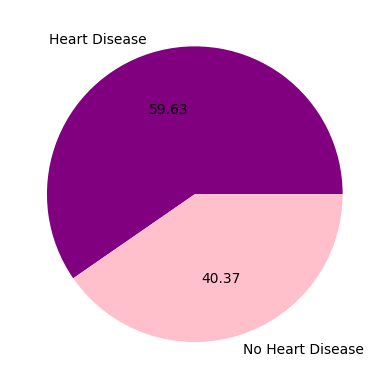

In [59]:
# Check class distribution
print(data['heart_disease'].value_counts(normalize=True))
#plot a pie chart showing the count of Heart disease
plt.pie(data['heart_disease'].value_counts(), labels =['Heart Disease','No Heart Disease'], autopct='%.2f', colors=['purple','pink'])

More than half (59.63)of the entire dataset are at a risk of having a heart disease basedon their lifestyle and clinical examination

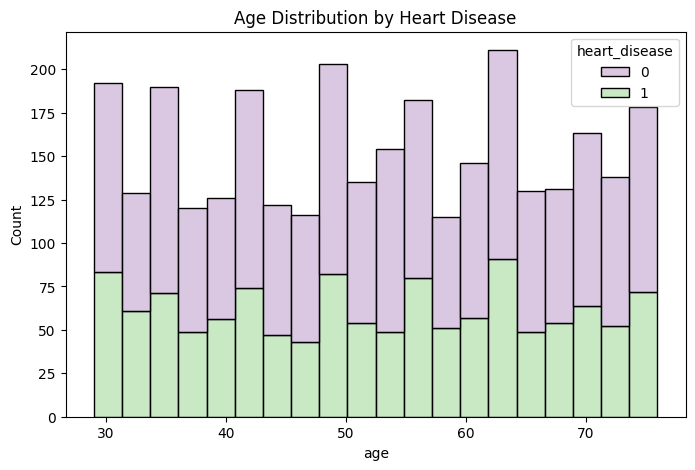

In [60]:
#Check the frequency of heart disease occurence accross various age
plt.figure(figsize=(8,5))
sns.histplot(data=data, x="age", hue="heart_disease", multiple="stack", bins=20, palette="PRGn")
plt.title("Age Distribution by Heart Disease")
plt.show()



From the above,it can be observed that that the distribution of risk for heart disease is well distributed and its occcurence is not just restricted to old people alone

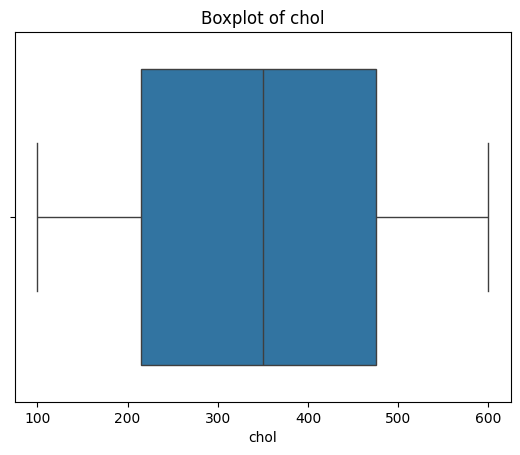

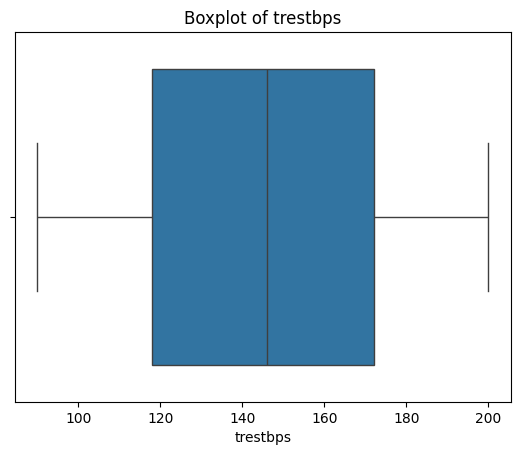

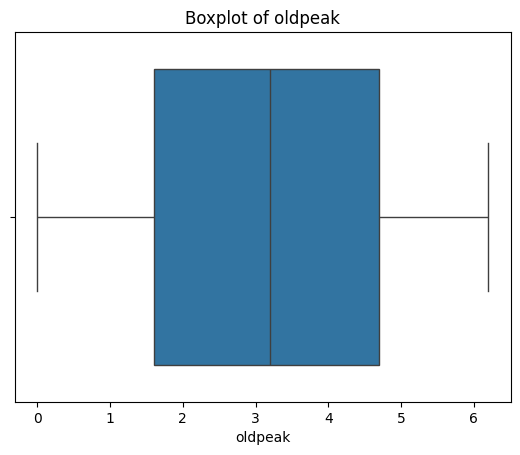

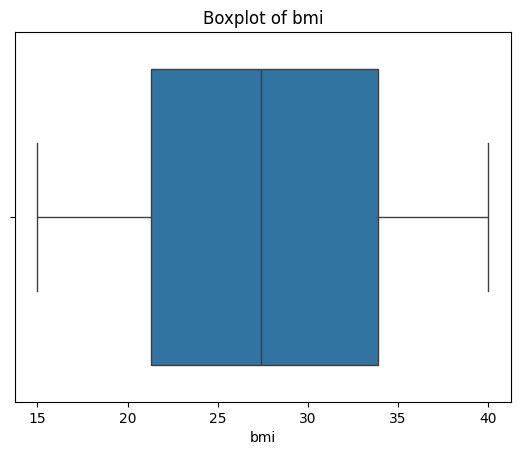

In [61]:
#Checking for outliers in clinical measures
# Visualize with boxplots
for col in ['chol', 'trestbps', 'oldpeak', 'bmi']:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

<Axes: xlabel='heart_disease', ylabel='trestbps'>

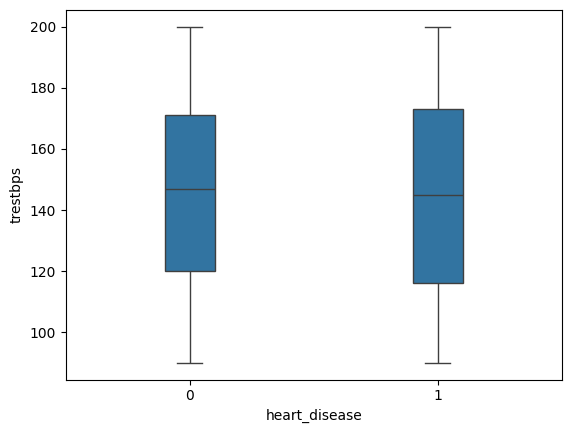

In [62]:
#sns.violinplot(x='heart_disease', y='trestbps', data=df, inner=None)
sns.boxplot(x='heart_disease', y='trestbps', data=data, width=0.2)


<Axes: xlabel='heart_disease', ylabel='thalach'>

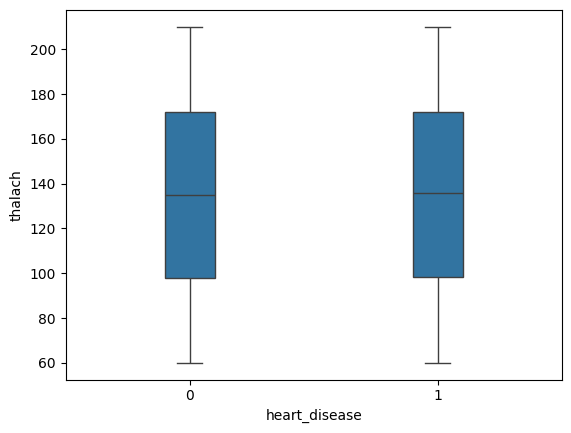

In [63]:
sns.boxplot(x='heart_disease', y='thalach', data=data, width=0.2)

<Axes: xlabel='heart_disease', ylabel='chol'>

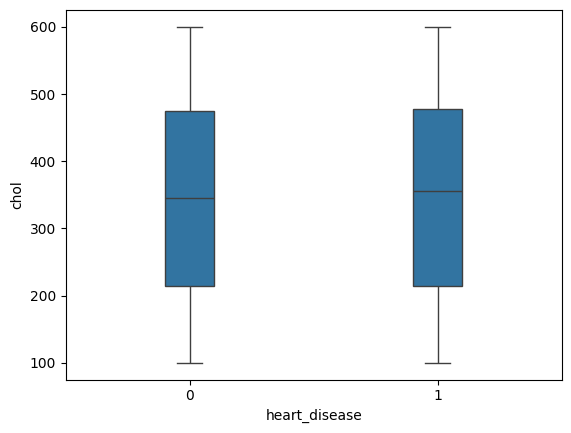

In [64]:
sns.boxplot(x='heart_disease', y='chol', data=data, width=0.2)

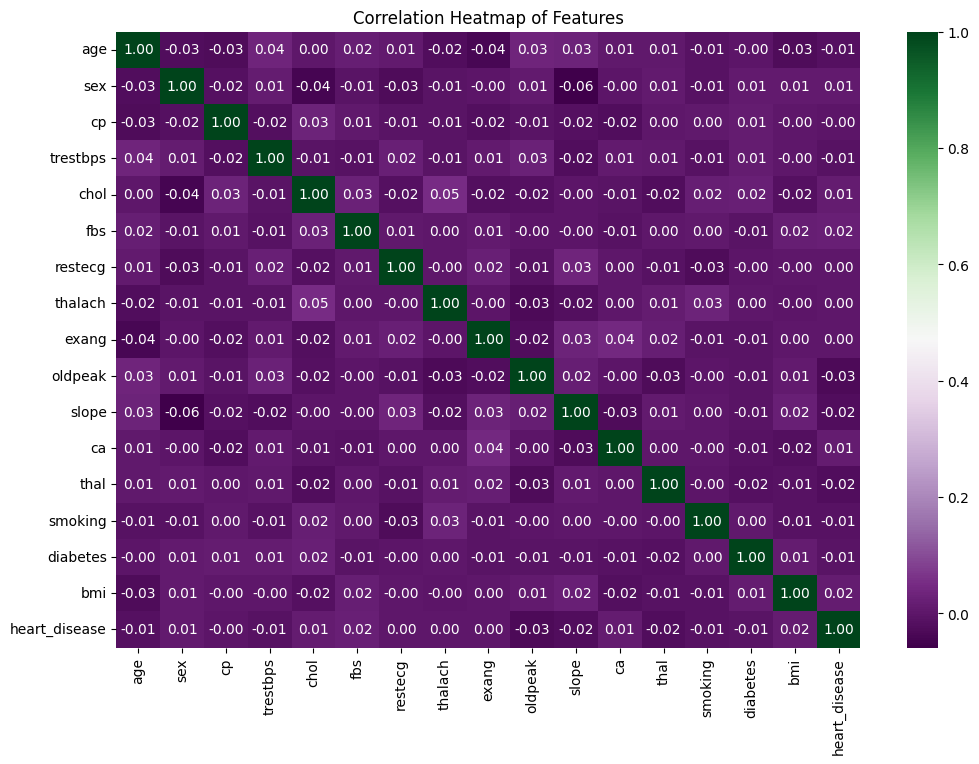

In [65]:
#Check for the correlation of the entire dataset
plt.figure(figsize=(12,8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="PRGn", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

#### Model Selection and Training
For this particular project,I want to make predictions as to the occurence of heart disease in patients based on clinical measures
I will be using the logistic regression, tree-based models (RF/GBM), and calibration assessment.


In [66]:
#import the necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



In [67]:
#Split the dataset
X=data.drop("heart_disease",axis=1)
y=data["heart_disease"]


In [68]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'smoking', 'diabetes',
       'bmi'],
      dtype='object')

In [69]:
y

0       0
1       0
2       0
3       1
4       1
       ..
3064    0
3065    1
3066    0
3067    0
3068    0
Name: heart_disease, Length: 3069, dtype: int64

In [70]:
#Balance the dataset Using Smote
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [71]:
#Train the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [72]:
#Encode the categorical datatypes column
cat_cols = ['sex','cp','restecg','slope','ca','thal','smoking','diabetes']
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col].astype(str))



In [73]:
#Instantiate all models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "XGBoost":XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [74]:
y_train

462     1
3607    1
328     0
2897    0
3603    1
       ..
1130    1
1294    0
860     0
3507    1
3174    1
Name: heart_disease, Length: 2562, dtype: int64

In [113]:
results={}
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100 # To get the result in percentage
    results[name] = acc

In [114]:
results

{'Logistic Regression': 55.82877959927141,
 'Decision Tree': 54.644808743169406,
 'Random Forest': 62.75045537340619,
 'Gradient Boosting': 58.28779599271403,
 'KNN': 58.19672131147541,
 'SVM': 49.08925318761385,
 'XGBoost': 60.65573770491803}

In [115]:
# Create the result as a list of dictionaries
data = [
    {"Model": "Logistic Regression", "Accuracy (%)": 55.828780},
    {"Model": "Decision Tree", "Accuracy (%)": 54.644809},
    {"Model": "Random Forest", "Accuracy (%)": 62.750455},
    {"Model": "Gradient Boosting", "Accuracy (%)": 58.287796},
    {"Model": "KNN", "Accuracy (%)": 58.196721},
    {"Model": "SVM", "Accuracy (%)": 49.089253},
    {"Model": "XGBoost", "Accuracy (%)": 60.655738}
]

# Convert to DataFrame
Results = pd.DataFrame(data)

In [116]:
Results

,Model,Accuracy (%)
0,Logistic Regression,55.828780
1,Decision Tree,54.644809
2,Random Forest,62.750455
3,Gradient Boosting,58.287796
4,KNN,58.196721
5,SVM,49.089253
6,XGBoost,60.655738


In [117]:
#Arrange and sort the result based on their accuracy
Results_sorted = Results.sort_values(by='Accuracy (%)', ascending=False)


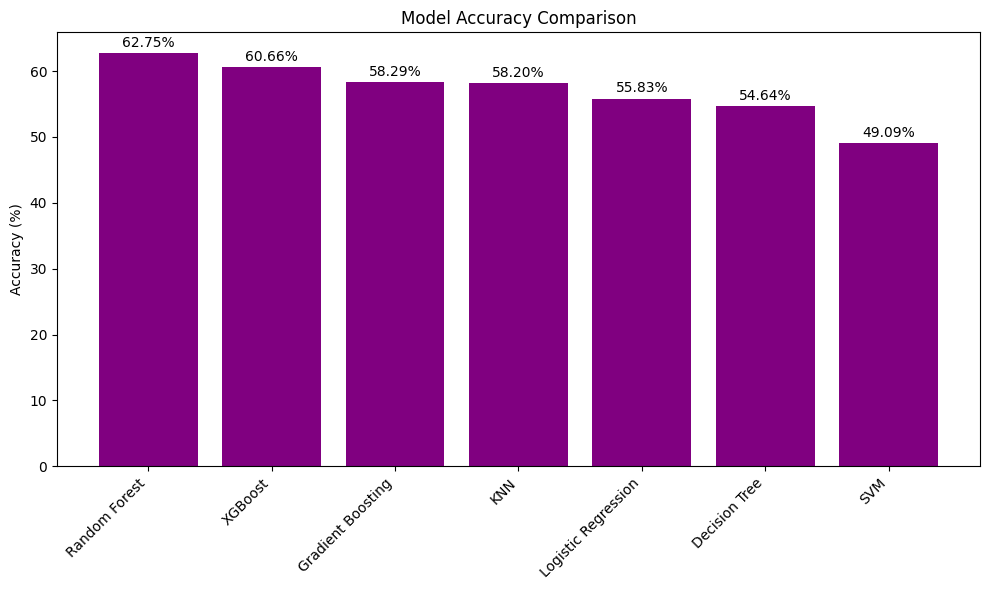

In [118]:
#Plot the accuracy score to compare them
plt.figure(figsize=(10, 6))
bars=plt.bar(Results_sorted['Model'], Results_sorted['Accuracy (%)'], color='purple')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.tight_layout()
plt.show()

The best model is the Random Forest model but I will be using the XGBoost model for my final model buliding and deployment because of its ability to capture complex patterns, handle class imbalance, and deliver more reliable accuracy on my dataset

In [119]:
xgb=XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [120]:
#xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost AUC:", roc_auc_score(y_test, y_prob_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost AUC: 0.6609663129700216
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       527
           1       0.64      0.56      0.60       571

    accuracy                           0.61      1098
   macro avg       0.61      0.61      0.61      1098
weighted avg       0.61      0.61      0.61      1098



In [121]:
#Use confusion matrix to check prediction performance
from sklearn.metrics import confusion_matrix

<Axes: >

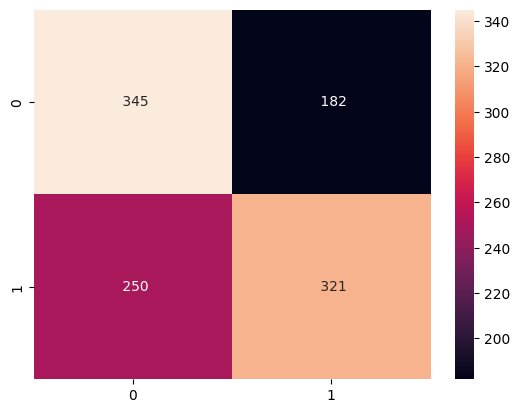

In [122]:
cm=confusion_matrix(y_test,y_pred_xgb)

#Plot the Confusion Matrix
sns.heatmap(cm,annot=True,fmt='4g')

In [125]:
#I want to balance the data using another method to see how better my data can perform.
#I will ve using the Oversampling method
count_class_0, count_class_1 = df1.heart_disease.value_counts()
count_class_1

df_class_0 = df1[df1["heart_disease"] == 0]
df_class_1 = df1[df1["heart_disease"] == 1]

df1_class_1_over = df_class_1.sample(count_class_0, replace=True)

df_test_over = pd.concat([df_class_0, df1_class_1_over], axis=0)

In [126]:
X2=df_test_over.drop("heart_disease",axis=1)
y2=df_test_over["heart_disease"]

In [127]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=15, stratify=y2)

In [135]:
Model_xgb=xgb.fit(X2_train, y2_train)
y2_pred_xgb = xgb.predict(X2_test)
y2_prob_xgb = xgb.predict_proba(X2_test)[:, 1]

print("XGBoost AUC:", roc_auc_score(y2_test, y2_prob_xgb))
print(classification_report(y2_test, y2_pred_xgb))

XGBoost AUC: 0.8220161844187643
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       366
           1       0.73      0.82      0.77       366

    accuracy                           0.76       732
   macro avg       0.76      0.76      0.76       732
weighted avg       0.76      0.76      0.76       732



<Axes: >

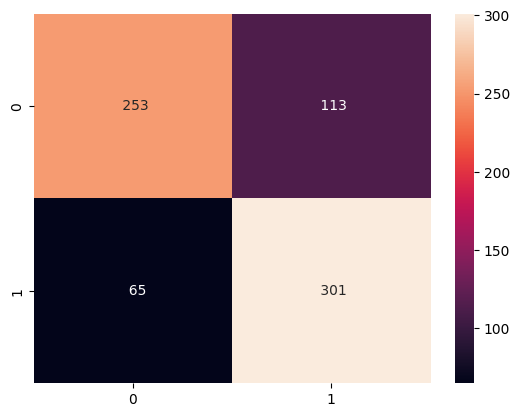

In [136]:
cm2=confusion_matrix(y2_test,y2_pred_xgb)

#Plot the Confusion Matrix
sns.heatmap(cm2,annot=True,fmt='4g')

In [137]:
Model_rf= RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
Model_rf.fit(X2_train, y2_train)
y2_pred = Model_rf.predict(X2_test)
print("Random Forest Accuracy:", accuracy_score(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

Random Forest Accuracy: 0.8101092896174863
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       366
           1       0.85      0.76      0.80       366

    accuracy                           0.81       732
   macro avg       0.81      0.81      0.81       732
weighted avg       0.81      0.81      0.81       732



In [139]:
import pickle

with open('Model_xgb.pkl', 'wb') as f:
    pickle.dump(Model_xgb, f)